In [31]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from rasterio.plot import show


In [32]:
def needlemass_to_lai(in_fn, out_fd, species, save_in='asc', plot=True):
    
    SLA = {'pine': 6.8, 'spruce': 4.7, 'decid': 14.0}

    bm_raster = rasterio.open(in_fn)
    bm_data = bm_raster.read(1)
    
    LAI = bm_data * 1e-3 * SLA[species]

    if not os.path.exists(out_fd):
        # Create a new directory because it does not exist
        os.makedirs(out_fd)
    
    out_meta = bm_raster.meta.copy()

    if save_in == 'geotiff':
        out_fn = os.path.join(out_fd, f'LAI_{species}') + '.tif'
        out_meta.update({"driver": "GTiff"})        
    elif save_in == 'asc':
        out_fn = os.path.join(out_fd, f'LAI_{species}') + '.asc'
        out_meta.update({"driver": "AAIGrid"})

    with rasterio.open(out_fn, 'w+', **out_meta) as out:
            src = out.write(LAI, 1)
    if plot==True:
        raster = rasterio.open(out_fn)
        show(raster)

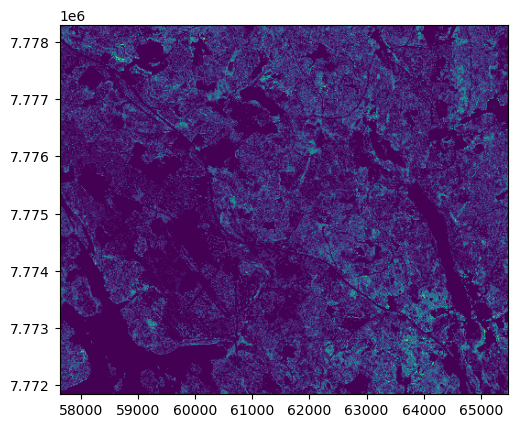

In [37]:
in_fn = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/vmi/bm_lehtip_elavatoksat_vmi1x_1721.tif'
out_fd = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/vmi/'
species = 'decid'
save_in='asc'

needlemass_to_lai(in_fn, out_fd, species)

In [17]:
file_bm_spruce = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/vmi/bm_kuusi_elavatoksat_vmi1x_1721.tif'
bm_spruce = rasterio.open(file_bm_spruce)
bm_spruce_d = bm_spruce.read(1)

file_bm_pine = r'/scratch/project_2000908/nousu/GISPUTS/Kuivalake_Catchment/GIS_inputs/kuivajarvi/vmi/bm_manty_elavatoksat_vmi1x_1721.tif'
bm_pine = rasterio.open(file_bm_pine)
bm_pine_d = bm_pine.read(1)

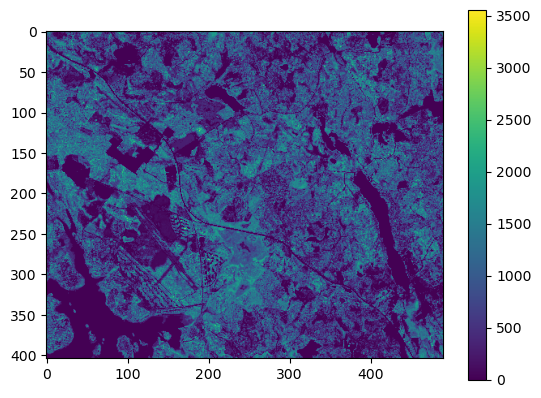

In [18]:
plt.imshow(bm_spruce_d); plt.colorbar(); plt.imshow(bm_pine_d)

In [7]:
SLA = {'pine': 6.8, 'spruce': 4.7, 'decid': 14.0}

In [19]:
LAI_spruce = bm_spruce_d * 1e-3 * SLA['spruce']
LAI_pine = bm_pine_d * 1e-3 * SLA['pine']

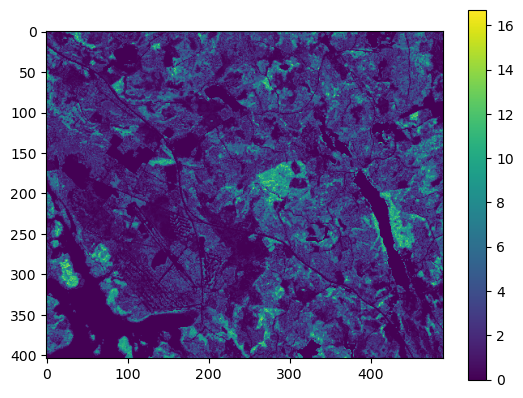

In [20]:
plt.imshow(LAI_spruce); plt.colorbar()

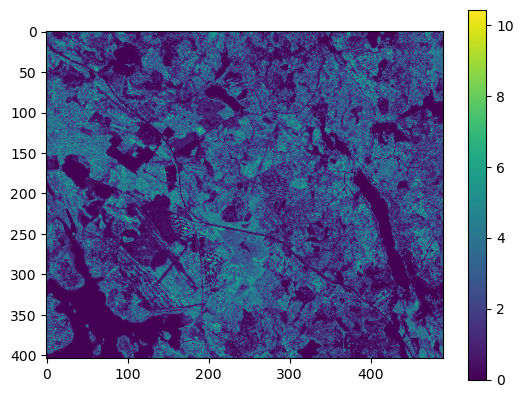

In [21]:
plt.imshow(LAI_pine); plt.colorbar()